In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from simulate import simulate
import multiprocessing as mp

In [2]:
N = 50    # number of walkers
Lx = 30
Ly = 30
stepSize = 0.5

infection_rate = 0.7
pollution_rate = 0.1
decay_rate = 0.95

# colors = []
# for i in range(N):
#     colors.append('#%06X' % np.random.randint(0, 0xFFFFFF))

In [3]:
realisations = 100
tMax = 1000
works = [(N, Lx, Ly, stepSize, infection_rate, pollution_rate, decay_rate, tMax) for i in range(realisations)]

In [8]:
%%time
if __name__ ==  '__main__': 
    pool = mp.Pool(mp.cpu_count())
    p_r = pool.map_async(simulate, works)
    results = p_r.get()
print('Done!')

Done!
Wall time: 12.9 s


In [9]:
# ## Do not run this! this is only for comparing parallel code to normal code!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# %%time
# results = np.zeros(shape=(realisations, tMax),dtype='int')
# for r in range(realisations):
#     results[r,:] = simulate((N, Lx, Ly, stepSize, infection_rate, pollution_rate, decay_rate, tMax))
# print('Done!')

Done!
Wall time: 26.4 s


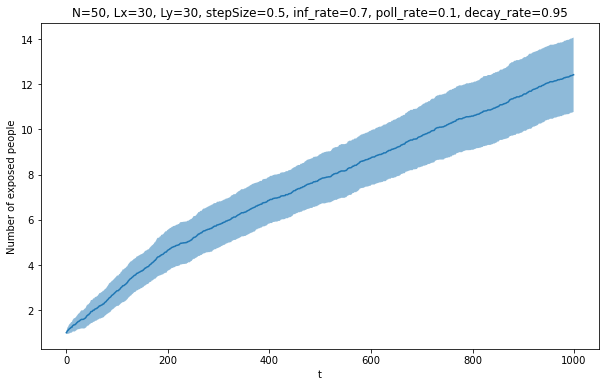

In [6]:
t = np.arange(tMax)
ts = np.mean(results, axis=0)
errors = np.std(results, axis=0)
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t, ts)
ax.set_xlabel("t")
ax.set_ylabel("Number of exposed people")
ax.set_title("N="+str(N)+", Lx="+str(Lx)+", Ly="+str(Ly)+", stepSize="+str(stepSize)+", inf_rate="+str(infection_rate)+", poll_rate="+str(pollution_rate)+", decay_rate="+str(decay_rate))
ax.fill_between(t, ts+errors/2, ts-errors/2, alpha=0.5)

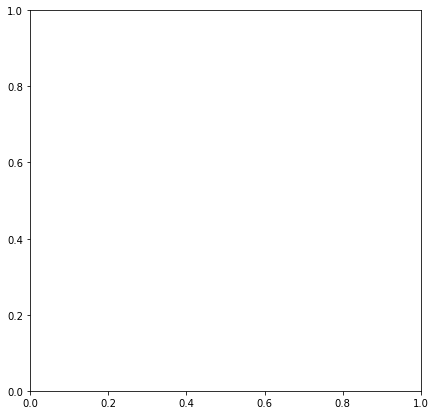

In [67]:
fig, ax= plt.subplots(figsize=(7,7))

tMax = 2000
step = np.zeros((N,2))

###initialize
infection_seed = np.random.randint(N)
update_tile()
agents['health'][infection_seed] = 2

disease_timeline = np.zeros( tMax , int )
pollute()


def animate(t):
    ax.clear()
    walk()
    update_tile()
    pollute()
    
    ax.imshow(pollution.T, extent =[0,Lx, 0,Ly], origin = 'lower', cmap='Greens')
    
#     plt.plot(agents['x'], agents['y'])
    ax.plot(agents['x'][ agents['health'] == 0 ], agents['y'][ agents['health'] == 0 ], 'o', alpha = 0.5)
    ax.plot(agents['x'][ agents['health'] == 2 ], agents['y'][ agents['health'] == 2 ], 'ro', alpha = 0.5)
    ax.plot(agents['x'][ agents['health'] == 1 ], agents['y'][ agents['health'] == 1 ], 'yo', alpha = 0.5)

    disease_timeline[t] = N - get_infetced()


#     ax.text(0 , 0.5 , "$t$ ="+ num_string )

In [68]:
ani = animation.FuncAnimation(fig, animate, save_count = 200)

dpi = 400
writer = animation.writers['pillow'](fps = 4)
file_name = str(time.gmtime()[0:5]) + '.GIF'
# file_name = str(time.gmtime()[0:5]) + '.mp4'
# ani.save( file_name ,dpi=dpi, writer = 'imagemagick')
ani.save( file_name, dpi=dpi, writer = writer)
